# What happened to Trump's Twitter habbit after impeachment inquiry

## Upload local csv files 
The data are from [Trump Twitter Archive](http://www.trumptwitterarchive.com/archive) and divided into four different time periods: Before announcement (May 4, 2009 to June 15, 2015); Announcement to Inauguration (June 16, 2015 to January 19, 2017); Inauguration to Inpeachment inquiry (January 20, 2017 to September 23, 2019); After Inpeachment inquiry (September 24, 2019 to October 12, 2019)

In [4]:
from google.colab import files

uploaded = files.upload()

Saving trump-announcement-inauguration.csv to trump-announcement-inauguration.csv
Saving trump-before-announcement.csv to trump-before-announcement.csv
Saving trump-impeachment-20191012.csv to trump-impeachment-20191012.csv
Saving trump-inauguration-impeachment.csv to trump-inauguration-impeachment.csv


## Read the data from four different periods

In [0]:
import pandas as pd
import math
allcap = []
pd0 = pd.read_csv('trump-before-announcement.csv', sep=',\s*', engine='python').dropna()
pd1 = pd.read_csv('trump-announcement-inauguration.csv', sep=',\s*', engine='python').dropna()
pd2 = pd.read_csv('trump-inauguration-impeachment.csv').dropna()
pd3 = pd.read_csv('trump-impeachment-20191012.csv').dropna()

In [4]:
len(pd0)

22137

In [0]:
len(pd1)

8171

In [0]:
len(pd2)

10439

In [0]:
len(pd3)

689

## Calculate the percentage of tweets containing capitalized words

In [0]:
def getPercentageTw(pdframe):
  tweets = pdframe['text']
  capitalized = tweets.str.contains(r"\b[A-Z]{4,}\b", na=False)
  allcap.append(pdframe[capitalized].shape[0]/tweets.shape[0])

In [0]:
getPercentageTw(pd3)
getPercentageTw(pd2)
getPercentageTw(pd1)
getPercentageTw(pd0)

In [7]:
allcap

[0.2757619738751814,
 0.28278570744324166,
 0.21135723901603232,
 0.09468310972579844]

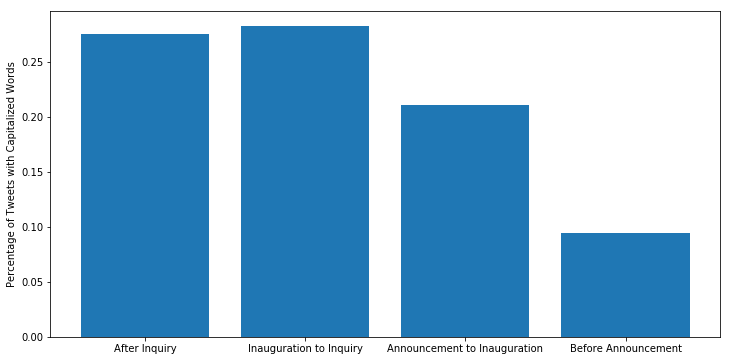

In [8]:
import matplotlib.pyplot as plt

names = ['After Inquiry', 'Inauguration to Inquiry', 'Announcement to Inauguration', 'Before Announcement']
plt.figure(figsize=(12, 6))
plt.bar(names, allcap)
plt.ylabel('Percentage of Tweets with Capitalized Words')
plt.show()

## Calculate the percentage of capitalized words among all words

In [0]:
OUT = 0
IN = 1
  
# Returns number of words in string 
def countWords(string): 
    state = OUT 
    wc = 0
  
    # Scan all characters one by one 
    for i in range(len(string)): 
  
        # If next character is a separator,  
        # set the state as OUT 
        if (string[i] == ' ' or string[i] == '\n' or
            string[i] == '\t'): 
            state = OUT 
  
        # If next character is not a word  
        # separator and state is OUT, then  
        # set the state as IN and increment  
        # word count 
        elif state == OUT: 
            state = IN 
            wc += 1
  
    # Return the number of words 
    return wc 

In [0]:
allcapword = []

In [0]:
def getPercentageWord(pdframe):
  # pdframe = pdframe.dropna()
  tweets = pdframe['text']
  countcap = tweets.str.findall(r"\b[A-Z]{4,}\b")
  all_length = 0
  for string in tweets:
     all_length += countWords(string)

  cap_length = 0
  for i in countcap:
    print(i)
    cap_length += len(i)
  
  allcapword.append(cap_length/all_length)

In [0]:
getPercentageWord(pd3)
getPercentageWord(pd2)
getPercentageWord(pd1)
getPercentageWord(pd0)

In [13]:
allcapword

[0.024765212916505852,
 0.02009866171729999,
 0.027817684099177335,
 0.010524971985418232]

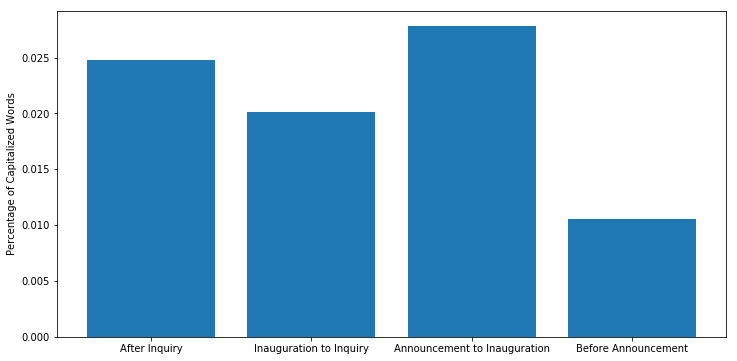

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(names, allcapword)
plt.ylabel('Percentage of Capitalized Words')
plt.show()

## Which accounts are retweeted by Donald Trump more often?

In [0]:
from re import sub
def mostoftenretweet(pdframe):
  retweet_freq = {}
  # pdframe = pdframe.dropna()
  retweet = pdframe["is_retweet"]
  all_retweets_text = pdframe[retweet]["text"]
  all_retweet_name = [sub(r"^RT @(.*?):.*", r"\1", text) for text in all_retweets_text]
  frequency = {}
  for word in all_retweet_name:
      count = frequency.get(word,0)
      frequency[word] = count + 1

  frequency_list = sorted(frequency, key=frequency.get, reverse=True)

  for words in frequency_list:
      retweet_freq[words] = frequency[words]
  
  return retweet_freq

In [0]:
retweet_freq3 = mostoftenretweet(pd3)
retweet_freq2 = mostoftenretweet(pd2)
retweet_freq1 = mostoftenretweet(pd1)
# retweet_freq0 = mostoftenretweet(pd0)

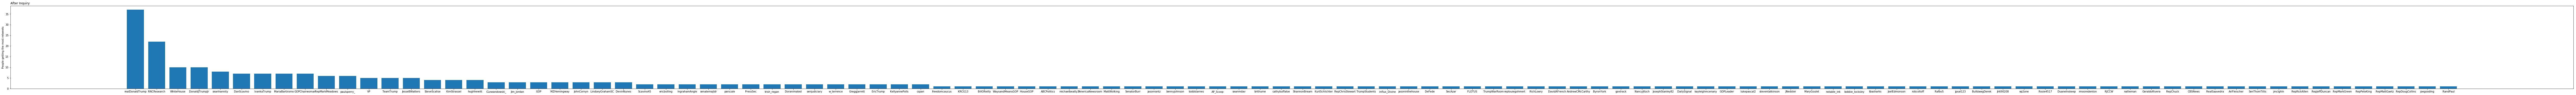

In [11]:
plt.figure(figsize=(180, 6))
plt.bar(range(len(retweet_freq3)), list(retweet_freq3.values()))
plt.xticks(range(len(retweet_freq3)), list(retweet_freq3.keys()))
plt.ylabel('People getting the most retweets')
plt.title('After Inquiry',loc='left')
plt.show()

In [0]:
plt.figure(figsize=(850, 6)).tight_layout()
plt.bar(range(len(retweet_freq2)), list(retweet_freq2.values()))
plt.xticks(range(len(retweet_freq2)), list(retweet_freq2.keys()))
plt.ylabel('People getting the most retweets')
plt.title('Inauguration to Inquiry',loc='left')
plt.show()

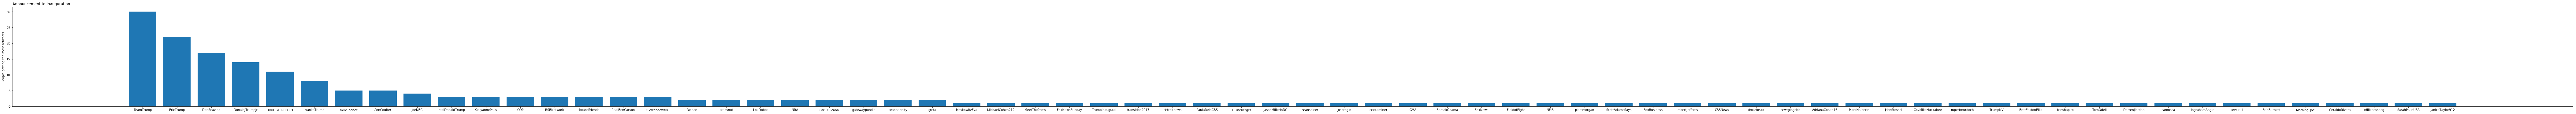

In [0]:
plt.figure(figsize=(150, 6))
plt.bar(range(len(retweet_freq1)), list(retweet_freq1.values()))
plt.xticks(range(len(retweet_freq1)), list(retweet_freq1.keys()))
plt.ylabel('People getting the most retweets')
plt.title('Announcement to Inauguration',loc='left')
plt.show()

## Word Frequency of Trump's tweets
Further analysis needs to be conducted to normalize the data and remove more stop words

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import operator
import collections
def wordFreq(pdframe):
  my_additional_stop_words = ['https','rt','http','amp']
  name_freq = {}
  unigram = CountVectorizer(ngram_range=(1, 1), stop_words = ENGLISH_STOP_WORDS.union(my_additional_stop_words), min_df=4, max_features=100)
  freq_words = unigram.fit_transform(pdframe['text'])
  name = unigram.get_feature_names()
  frequency = freq_words.toarray().sum(axis=0)
  for i in range(len(name)):
    name_freq[name[i]] = frequency[i]
  name_freq = sorted(name_freq.items(), key=operator.itemgetter(1), reverse = True)
  sorted_dict = collections.OrderedDict(name_freq)
  return sorted_dict

In [0]:
name_freq3 = wordFreq(pd3)

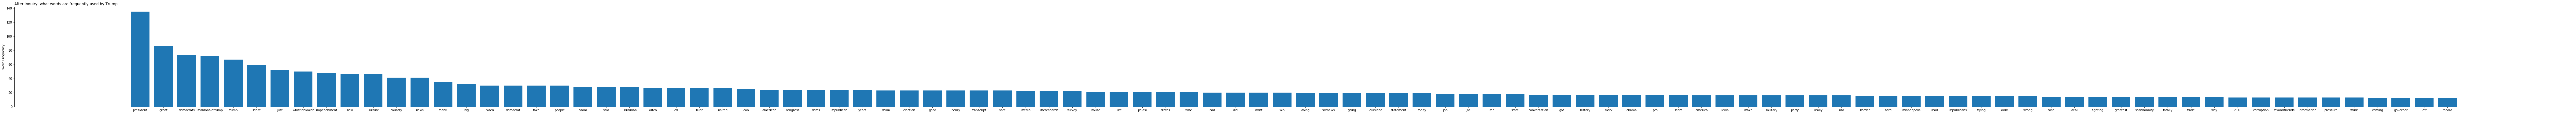

In [12]:
plt.figure(figsize=(150, 6))
plt.bar(range(len(name_freq3)), list(name_freq3.values()))
plt.xticks(range(len(name_freq3)), list(name_freq3.keys()))
plt.ylabel('Word Frequency')
plt.title('After Inquiry: what words are frequently used by Trump',loc='left')
plt.show()

In [0]:
name_freq2 = wordFreq(pd2)

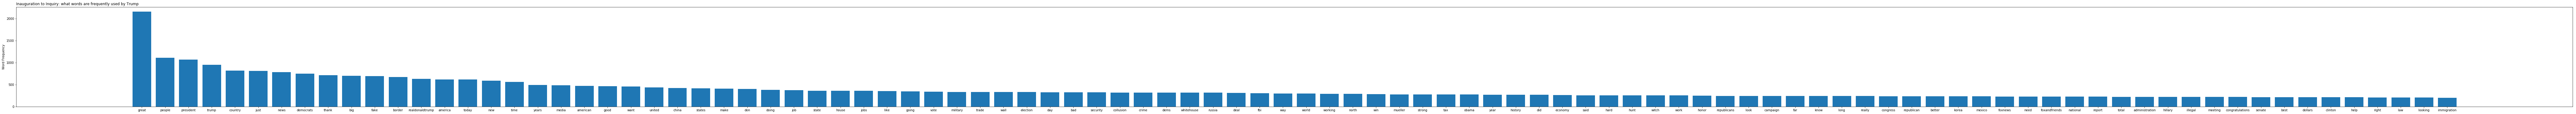

In [14]:
plt.figure(figsize=(150, 6))
plt.bar(range(len(name_freq2)), list(name_freq2.values()))
plt.xticks(range(len(name_freq2)), list(name_freq2.keys()))
plt.ylabel('Word Frequency')
plt.title('Inauguration to Inquiry: what words are frequently used by Trump',loc='left')
plt.show()

In [0]:
name_freq1 = wordFreq(pd1)

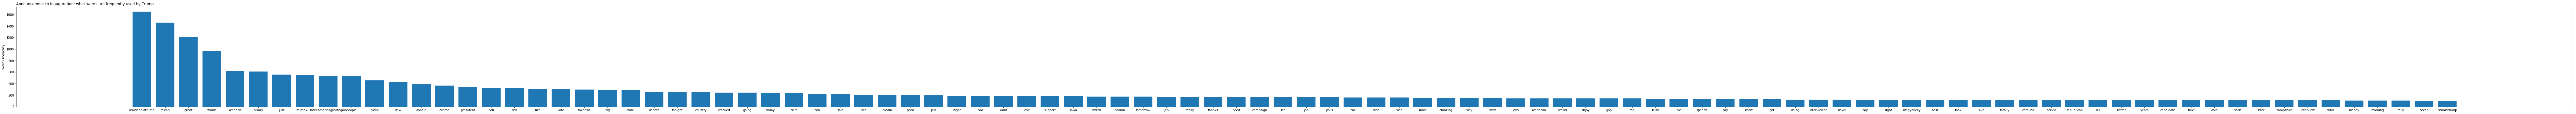

In [16]:
plt.figure(figsize=(150, 6))
plt.bar(range(len(name_freq1)), list(name_freq1.values()))
plt.xticks(range(len(name_freq1)), list(name_freq1.keys()))
plt.ylabel('Word Frequency')
plt.title('Announcement to Inauguration: what words are frequently used by Trump',loc='left')
plt.show()

In [0]:
name_freq0 = wordFreq(pd0)

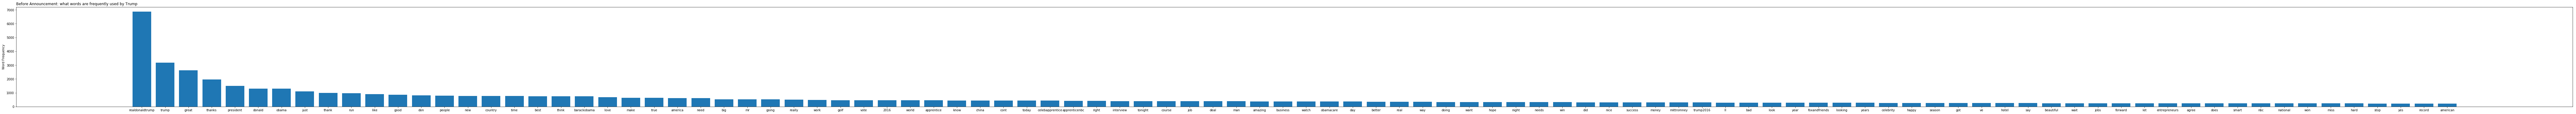

In [18]:
plt.figure(figsize=(150, 6))
plt.bar(range(len(name_freq0)), list(name_freq0.values()))
plt.xticks(range(len(name_freq0)), list(name_freq0.keys()))
plt.ylabel('Word Frequency')
plt.title('Before Announcement: what words are frequently used by Trump',loc='left')
plt.show()